In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Ejercicio 02 - Descripción

[](http://)


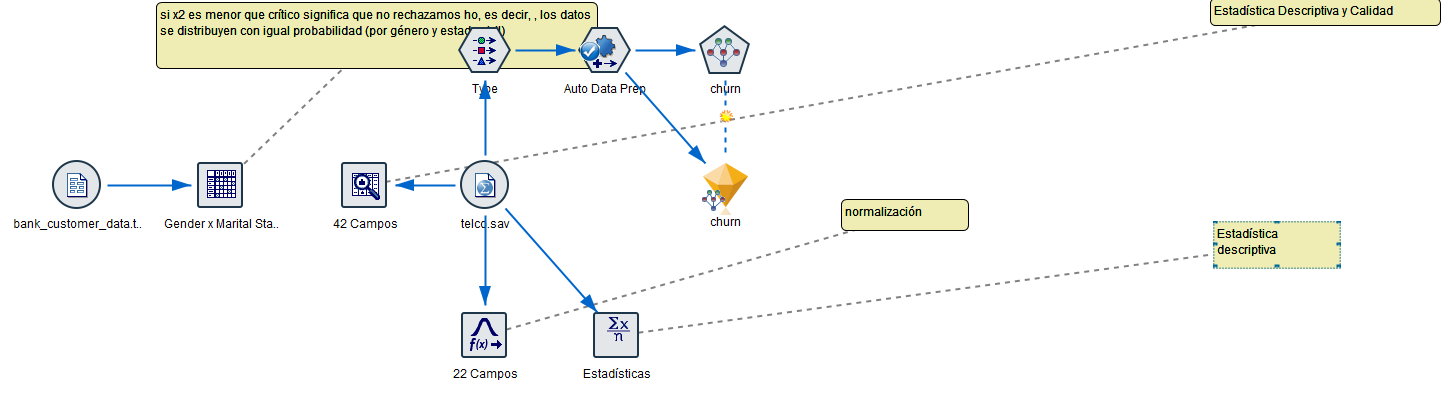

# Carga del dataset

In [ ]:
# abrimos desde la dirección de github
namefile = "https://raw.githubusercontent.com/jovenluk/WFML/master/Datasets/bank_customer_data.txt"
df = pd.read_csv(namefile)
df.head()
df.describe()

In [ ]:
!pip install quickda


# EDA with QuickDA
* [Using QuickDA for Preprocessing and Manipulating Data](https://towardsdatascience.com/automating-exploratory-data-analysis-using-quickda-fd68ad8e3873)
* [Project description](https://pypi.org/project/quickda/)

In [ ]:
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

explore(df, method='profile', report_name='Report') 

# Tabulación cruzada - Gender / Marital Status
[Ayuda crosstab de pandas](https://www.it-swarm-es.com/es/python/como-hacer-una-tabla-cruzada-pandas-con-porcentajes/1043920395/)

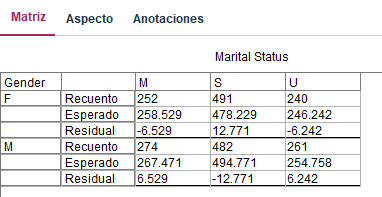

In [ ]:
# Gender x Marital Status
pd.crosstab(df.Gender,df["Marital Status"], normalize='index')


pd.crosstab(df.A,df.B, normalize='index')

# Dataset Telco SAV

In [ ]:
# abrimos desde la dirección de github
namefile = "https://raw.githubusercontent.com/jovenluk/WFML/master/Datasets/Telco_Ejercicio_02.csv"
telco = pd.read_csv(namefile)
telco.head()
telco.describe()

In [ ]:
explore(telco, method='profile', report_name='Report') 

# Data Cleaning
Limpiamos Nan

In [ ]:
telco = clean(telco, "default")

# Type
Marcamos campo a predecir
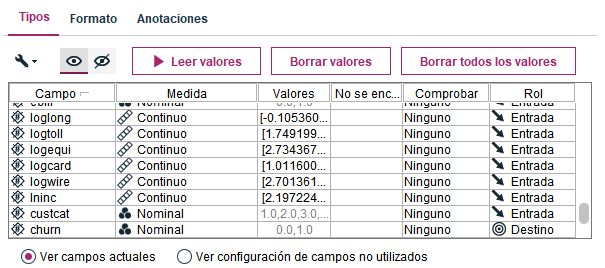

In [ ]:
X = cols = list(telco.columns)
feature_cols = [x for x in cols if not x in ("churn")]
target_col = ["churn"]

X = telco[feature_cols] # Features
y = telco[target_col] # Target variable

# Normalize
Dejamos columnas entre 0 y 1

In [ ]:
from sklearn import preprocessing
d = preprocessing.normalize(telco, axis=0)
scaled_df = pd.DataFrame(X)
scaled_df.head()

# Bayesian Network
[BBN: Bayesian Belief Networks — How to Build Them Effectively in Python](https://towardsdatascience.com/bbn-bayesian-belief-networks-how-to-build-them-effectively-in-python-6b7f93435bba)

In [ ]:
import networkx as nx # for drawing graphs
import matplotlib.pyplot as plt # for drawing graphs

# for creating Bayesian Belief Networks (BBN)
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController